In [ ]:
#!pip install tensorflow==2.8
#!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## Cloning TFOD 2.0 Github

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 76701, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 76701 (delta 267), reused 454 (delta 230), pack-reused 76179
Receiving objects: 100% (76701/76701), 596.90 MiB | 17.80 MiB/s, done.
Resolving deltas: 100% (54374/54374), done.


In [ ]:
pwd

'/content'

## Protobuf Installation/Compilation

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

## COCO API installation

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [ ]:
cp -r pycocotools /content/models/research

## Install the Object Detection API

In [ ]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 6.9 MB/s 
     |████████████████████████████████| 352 kB 55.9 MB/s 
     |████████████████████████████████| 2.1 MB 56.7 MB/s 
     |████████████████████████████████| 25.9 MB 85.9 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.1 MB/s 
     |████████████████████████████████| 636 kB 74.8 MB/s 
     |████████████████████████████████| 238 kB 75.4 MB/s 
     |

## Test your Installation

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-09-03 21:15:13.395698: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0903 21:15:13.758766 140272665151360 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.61s
I0903 21:15:14.015150 140272665151360 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.61s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.53s
I0903 21:15:14.545179 140272665151360 test_u

# Training Custom Object Detector
### Preparing the Workspace
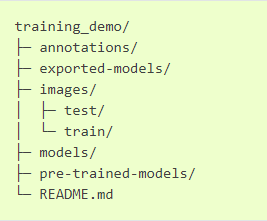

### Copy a pre-trained model from tensorflow zoo to pre-trained-models

In [ ]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-09-03 21:30:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   191MB/s    in 1.9s    

2022-09-03 21:30:09 (191 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



##### The file is in tar.gz format need to conver it to a usable file

In [ ]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


### Create TensorFlow Records

In [ ]:
pwd

'/content/training_demo/pre-trained-models'

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported-models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


#### ---->> Make a new folder in models
#### ---->> Copy the pipeline file from pre-trained-models and paste it in models
#### ---->> Edit the pipeline

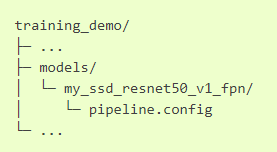

### Training the Model

In [ ]:
pwd

'/content'

In [ ]:
ls

models/  plot_object_detection_saved_model.py  sample_data/  training_demo/


In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

2022-09-04 00:08:48.931511: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0904 00:08:48.981653 139730272331648 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0904 00:08:48.985638 139730272331648 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0904 00:08:48.985800 139730272331648 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0904 00:08:49.145273 139730272331648 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

## Exporting a Trained Model

In [ ]:
pwd

'/content/training_demo'

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/training_demo/exported-models/my_model


2022-09-04 01:30:23.558198: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0904 01:30:23.698569 139857076631424 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-09-04 01:30:43.608164: W ten

Loading model...Done! Took 22.406437397003174 seconds
Running inference for /content/training_demo/images/test/dc-Cover-evld0slcakhurbqjspi1tk6tj0-20220424011822.Medi.jpeg... Done


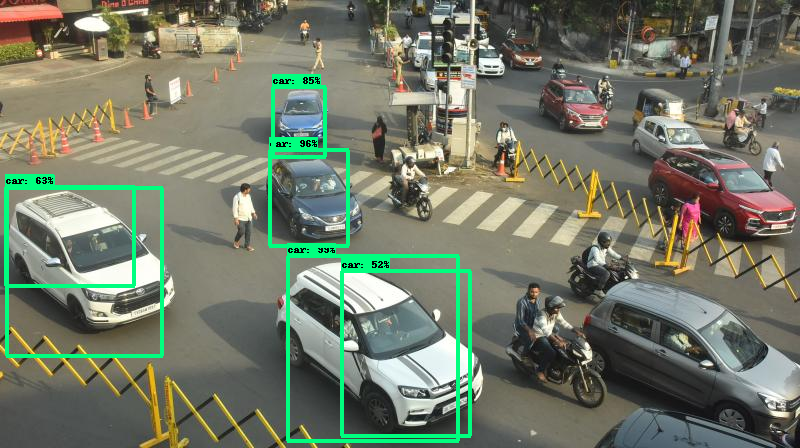

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/dc-Cover-evld0slcakhurbqjspi1tk6tj0-20220424011822.Medi.jpeg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED